In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

C:\Users\Kausik\AppData\Local\Temp\ipykernel_4784\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir=r"E:\datasets\train_set"

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 8965 files belonging to 40 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

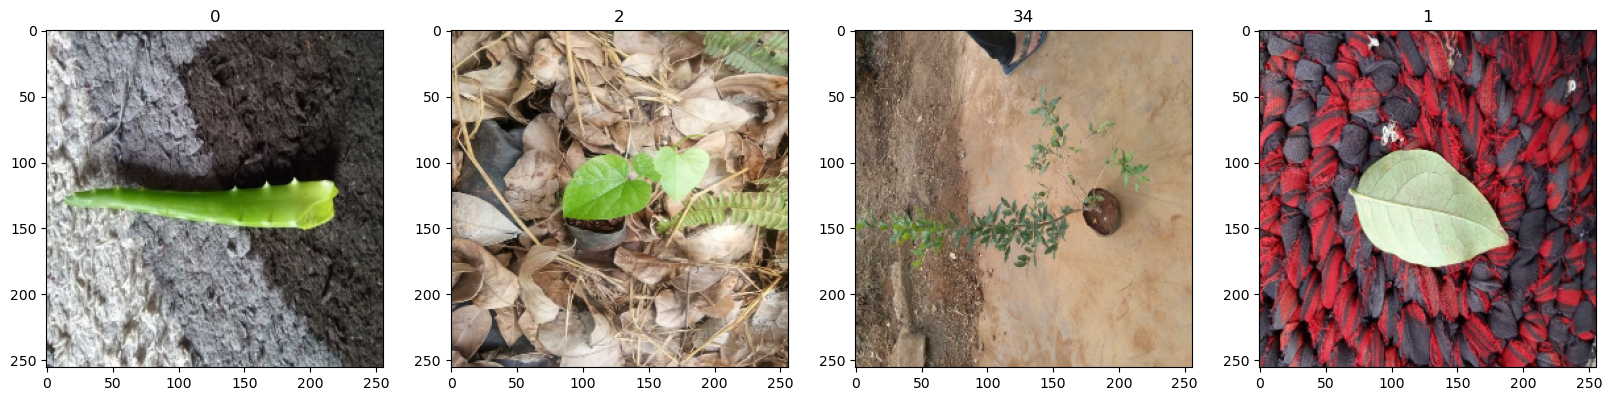

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.2654182 , 0.33735448, 0.26413143],
          [0.25030315, 0.34484002, 0.28209814],
          [0.24580784, 0.38176915, 0.32175222],
          ...,
          [0.7539187 , 0.66000783, 0.48787242],
          [0.78719485, 0.693284  , 0.52114856],
          [0.7651753 , 0.6712644 , 0.49128586]],
 
         [[0.29347667, 0.36541292, 0.29198632],
          [0.3165349 , 0.41027725, 0.3463526 ],
          [0.25507897, 0.3865494 , 0.32473275],
          ...,
          [0.7530008 , 0.6652863 , 0.5018212 ],
          [0.7617192 , 0.6740048 , 0.5093183 ],
          [0.7439447 , 0.6562303 , 0.48492205]],
 
         [[0.3071422 , 0.377689  , 0.3031792 ],
          [0.3499489 , 0.44035777, 0.36979848],
          [0.29349378, 0.41685072, 0.35278082],
          ...,
          [0.72949624, 0.65808845, 0.50536174],
          [0.716339  , 0.6449312 , 0.4865196 ],
          [0.70494395, 0.6345702 , 0.47296634]],
 
         ...,
 
         [[0.7437931 , 0.72026366, 0.5927055 ],
          [0.77233

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

196

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
196/196 [==============================] - 247s 1s/step - loss: -20274507776.0000 - accuracy: 0.0228 - val_loss: -150462087168.0000 - val_accuracy: 0.0273
Epoch 2/10
196/196 [==============================] - 248s 1s/step - loss: -2861912293376.0000 - accuracy: 0.0228 - val_loss: -9720621432832.0000 - val_accuracy: 0.0257
Epoch 3/10
196/196 [==============================] - 259s 1s/step - loss: -40097244250112.0000 - accuracy: 0.0234 - val_loss: -91621064441856.0000 - val_accuracy: 0.0251
Epoch 4/10
196/196 [==============================] - 258s 1s/step - loss: -225191376453632.0000 - accuracy: 0.0233 - val_loss: -414086386941952.0000 - val_accuracy: 0.0246
Epoch 5/10
196/196 [==============================] - 254s 1s/step - loss: -783402638770176.0000 - accuracy: 0.0230 - val_loss: -1253909930704896.0000 - val_accuracy: 0.0273
Epoch 6/10
196/196 [==============================] - 256s 1s/step - loss: -2065824776978432.0000 - accuracy: 0.0234 - val_loss: -3034339902226432.

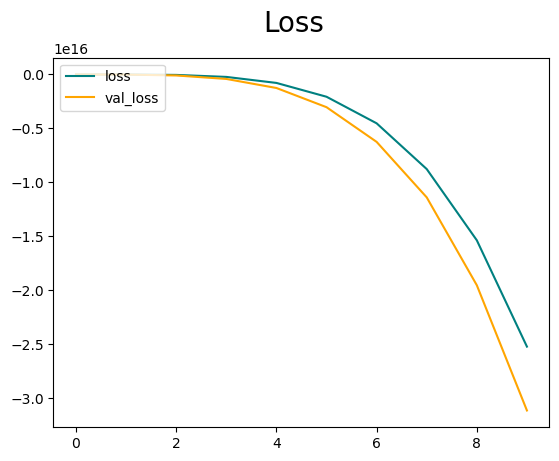

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

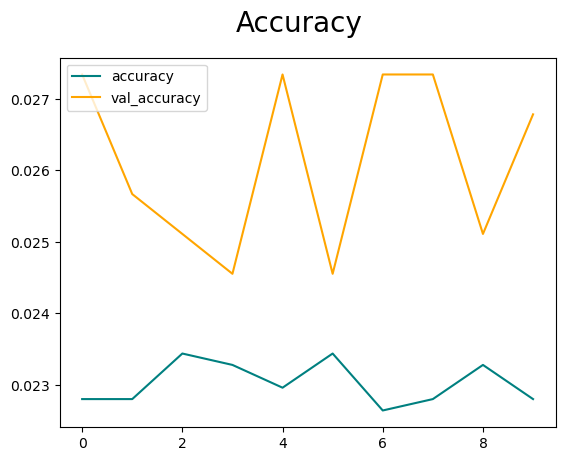

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
hist.history

{'loss': [-20274507776.0,
  -2861912293376.0,
  -40097244250112.0,
  -225191376453632.0,
  -783402638770176.0,
  -2065824776978432.0,
  -4529718397239296.0,
  -8774550003122176.0,
  -1.5381525574975488e+16,
  -2.524127798545613e+16],
 'accuracy': [0.022799745202064514,
  0.022799745202064514,
  0.0234375,
  0.02327806130051613,
  0.022959183901548386,
  0.0234375,
  0.022640306502580643,
  0.022799745202064514,
  0.02327806130051613,
  0.022799745202064514],
 'val_loss': [-150462087168.0,
  -9720621432832.0,
  -91621064441856.0,
  -414086386941952.0,
  -1253909930704896.0,
  -3034339902226432.0,
  -6252282677035008.0,
  -1.1399203980836864e+16,
  -1.9550051181264896e+16,
  -3.11660543737856e+16],
 'val_accuracy': [0.02734375,
  0.02566964365541935,
  0.02511160634458065,
  0.0245535708963871,
  0.02734375,
  0.0245535708963871,
  0.02734375,
  0.02734375,
  0.02511160634458065,
  0.02678571455180645]}

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 266ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.97209823, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.02232143, shape=(), dtype=float32)


In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

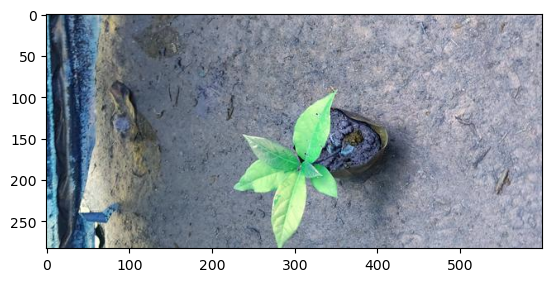

In [35]:
img = cv2.imread(r"E:\datasets\train_set\Avacado\5685.jpg")
plt.imshow(img)
plt.show()

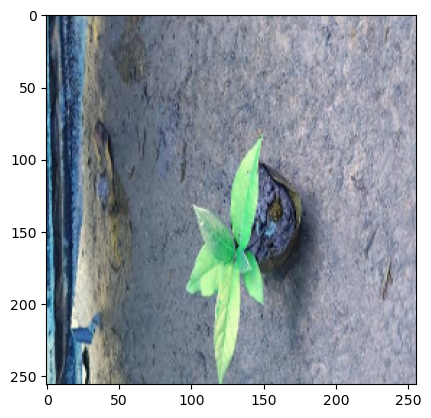

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 112ms/step


In [38]:
yhat

array([[1.]], dtype=float32)

In [39]:
if yhat < 0.5: 
    print(f'Predicted class is non medicinal')
else:
    print(f'Predicted class is medicinal')

Predicted class is medicinal
